# Analysis of Prox-seq data

Author: Hoang Van Phan

Address: Pritzker School of Molecular Engineering
         The University of Chicago
         Chicago, IL 60637, USA

## Simulation of single cell PLA data

This section shows how to simulate PLA data.

#### Import packages and the custom functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import ProxseqFunctions as myFuncs

#### Define simulation parameters

In [2]:
# Three protein targets
probeA_ns = [1000,1000,750] # Abundance of non-complex forming of probe A for each protein
probeB_ns = [1000,500,1000] # Abundance of non-complex forming of probe B for each protein

# 9 possible PLA products, 6 possible pairwise protein complexes
# Only two homodimers are true protein complexes
num_complex = np.zeros((3,3)) # entry [i,j] is the abundance of complex i:j (PLA probe A targets protein i, PLA probe B targets protein j)
num_complex[0,0] = 100
num_complex[1,1] = 100

#### Simulate 100 single cells

In [3]:
dge, dge_true = myFuncs.simulatePLA(num_complex, probeA_ns, probeB_ns,
                                    n_cells=100,
                                    cell_d=10000, # cell diameter in nm
                                    PLA_dist=50, # ligation distance in nm
                                    seed_num=2020, cell_variance=True, ligate_all=True)

2020-04-29 11:54:41     Start simulation
2020-04-29 11:54:48     Processed    10 cells
2020-04-29 11:54:55     Processed    20 cells
2020-04-29 11:54:57     Processed    30 cells
2020-04-29 11:55:01     Processed    40 cells
2020-04-29 11:55:04     Processed    50 cells
2020-04-29 11:55:07     Processed    60 cells
2020-04-29 11:55:10     Processed    70 cells
2020-04-29 11:55:13     Processed    80 cells
2020-04-29 11:55:15     Processed    90 cells
2020-04-29 11:55:17     Processed   100 cells


The data frame dge contains the simulated counts of PLA products. The data frame dge_true contains the true complex abundance.

#### Plot observed vs expected PLA count

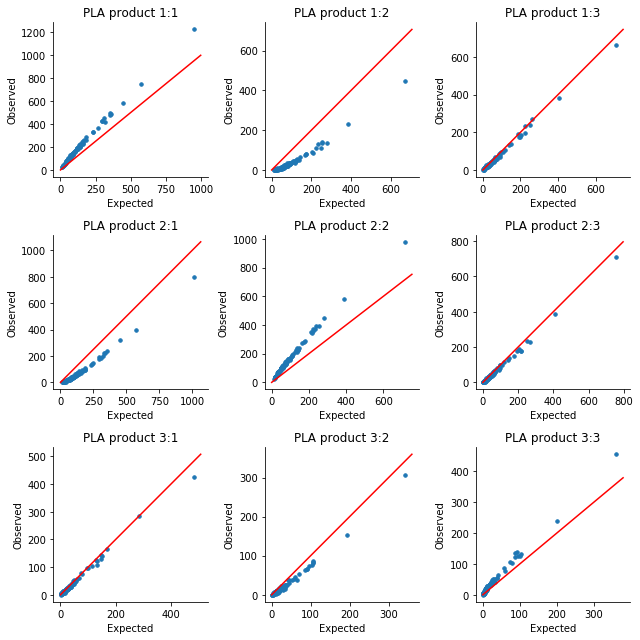

In [4]:
# Calculate expected PLA count
dge_expected = myFuncs.calculateExpected(dge)

# Plot
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(9,9))
for counter, i in enumerate(dge.index):
    row_i = int(counter / 3)
    col_i = int(counter % 3)
    ax[row_i,col_i].scatter(dge_expected.loc[i,:], dge.loc[i,:], s=12)
    _, xmax = ax[row_i,col_i].get_xlim()
    ax[row_i,col_i].plot([0,xmax],[0,xmax], 'red')
    ax[row_i,col_i].set_xlabel("Expected")
    ax[row_i,col_i].set_ylabel("Observed")
    ax[row_i,col_i].set_title(f"PLA product {i}")
sns.despine(fig=fig)
fig.tight_layout()

The red lines show the y=x line. PLA products above the red line probably represent true protein complexes.

## Estimating protein complex abundance

This section shows how to estimate the protein complex abundance from the simulated PLA data.

In [5]:
dge_complex = myFuncs.estimateComplexes(dge, sym_weight=0.25, nIter=100, tol=1)

estimateComplexes done: Loop number 14, tolerance 0.91


#### Plot estimated complex abundance vs observed PLA product count

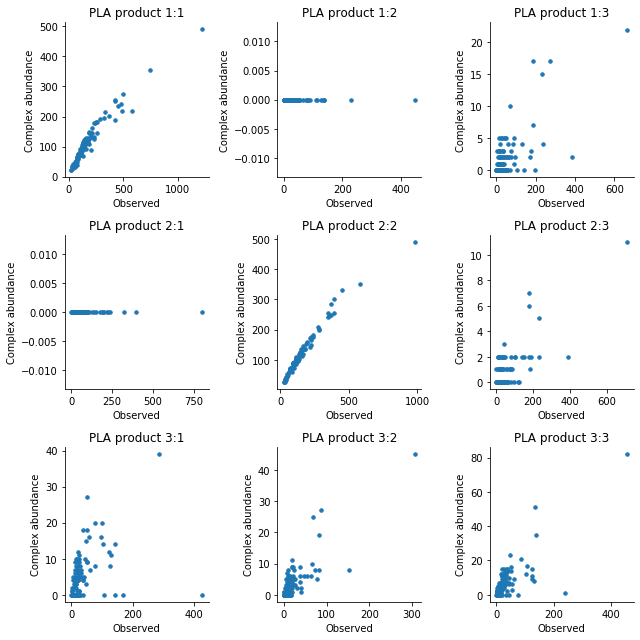

In [6]:
# Plot
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(9,9))
for counter, i in enumerate(dge.index):
    row_i = int(counter / 3)
    col_i = int(counter % 3)
    ax[row_i,col_i].scatter(dge.loc[i,:], dge_complex.loc[i,:], s=12)
    ax[row_i,col_i].set_xlabel("Observed")
    ax[row_i,col_i].set_ylabel("Complex abundance")
    ax[row_i,col_i].set_title(f"PLA product {i}")
sns.despine(fig=fig)
fig.tight_layout()

While 1:1 and 2:2 are the only true protein complexes. However, 1:3, 3:1, 2:3, 3:2 and 3:3 were also estimated to be protein complexes (ie, false positive). These false positives can be eliminated by looking at the ratio of estimated complex abundance to observed PLA count: the false positives tend to have low ratios compared to true positives.